In \[24\]:

    import pandas as pd
    import numpy as np
    import os
    from tqdm import tqdm
    import zipfile

# Text Data - Sentiment Analysis<a href="#Text-Data---Sentiment-Analysis" class="anchor-link">¶</a>

## Data Description<a href="#Data-Description" class="anchor-link">¶</a>

### This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all \~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.<a
href="#This-dataset-consists-of-reviews-of-fine-foods-from-amazon.-The-data-span-a-period-of-more-than-10-years,-including-all-~500,000-reviews-up-to-October-2012.-Reviews-include-product-and-user-information,-ratings,-and-a-plain-text-review.-It-also-includes-reviews-from-all-other-Amazon-categories."
class="anchor-link">¶</a>

### The main aim of this project is to demonstrate the basics of Natural Language Processing(NLP).<a
href="#The-main-aim-of-this-project-is-to-demonstrate-the-basics-of-Natural-Language-Processing(NLP)."
class="anchor-link">¶</a>

\*\*Following steps mentioned below are followed:

#### 1. Data Loading<a href="#1.-Data-Loading" class="anchor-link">¶</a>

#### 2.Exploratory Data Analysis<a href="#2.Exploratory-Data-Analysis" class="anchor-link">¶</a>

#### 3.Data Preprocessing<a href="#3.Data-Preprocessing" class="anchor-link">¶</a>

-   Convert sentence into lower case
-   Remove Stop Words
-   Stemming or Lemmatization \#### 4.Data Preparation
-   Train Test Split
-   Text to numerical vector using Bag of Words \#### 5.Training and
    Evaluation

# 1. Loading the Data<a href="#1.-Loading-the-Data" class="anchor-link">¶</a>

#### Let's first have a look at the dataset and understand the size, attribute names etc<a
href="#Let&#39;s-first-have-a-look-at-the-dataset-and-understand-the-size,-attribute-names-etc"
class="anchor-link">¶</a>

In \[ \]:

    import pandas as pd
    import numpy as np
    import os
    from tqdm import tqdm
    import zipfile

In \[7\]:

    zip_file_path = r'C:\Users\syeda\Downloads\txt_reviews.zip'
    extract_path = r'C:\Users\syeda\Downloads\txt_reviews_extracted_new'

In \[8\]:

    %%time
    # Extract the ZIP file if it hasn't been extracted
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

    CPU times: total: 6min 38s
    Wall time: 17min 21s

In \[9\]:

    # List the files in the extracted directory with full paths
    file_list = [os.path.join(extract_path, file_name) for file_name in os.listdir(extract_path)]

    # Debugging: Print the list of files found
    print("Files found:", file_list)

    Files found: ['C:\\Users\\syeda\\Downloads\\txt_reviews_extracted_new\\txt_reviews']

In \[12\]:

    %%time
    import os

    def read_text_files(extract_path):
        ProductId=[]
        UserId=[]
        ProfileName=[]
        HelpfulnessNumerator=[]
        HelpfulnessDenominator=[]
        Score=[]
        Time=[]
        ReviewSummary=[]
        ReviewText=[]

        for root, dirs, files in os.walk(extract_path):
            for file_name in files:
                if file_name.endswith(".txt"):
                    file_path = os.path.join(root, file_name)
                    try:
                        with open(file_path, "r") as f:
                            lines = f.readlines()
                            if len(lines) >= 9:  # Ensure there are at least 9 lines
                                ProductId.append(lines[0].split(':')[1].strip())
                                UserId.append(lines[1].split(':')[1].strip())
                                ProfileName.append(lines[2].split(':')[1].strip())
                                HelpfulnessNumerator.append(lines[3].split(':')[1].strip())
                                HelpfulnessDenominator.append(lines[4].split(':')[1].strip())
                                Score.append(lines[5].split(':')[1].strip())
                                Time.append(lines[6].split(':')[1].strip())
                                ReviewSummary.append(lines[7].split(':')[1].strip())
                                ReviewText.append(lines[8].split(':')[1].strip())
                    except Exception as e:
                        print(f"Error reading file {file_path}: {e}")

        return ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText

    # Example usage:
    # Correct the path string and use raw string notation
    extract_path = r'C:\Users\syeda\Downloads\txt_reviews_extracted_new'
    ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText = read_text_files(extract_path)

    # Print lengths of lists to verify successful reading
    print(f"Number of reviews read: {len(ProductId)}")

    Error reading file C:\Users\syeda\Downloads\txt_reviews_extracted_new\txt_reviews\review_53891.txt: 'charmap' codec can't decode byte 0x9d in position 190: character maps to <undefined>
    Number of reviews read: 568453
    CPU times: total: 2min 10s
    Wall time: 1h 1min 28s

In \[23\]:

    # Create a DataFrame from the lists
    data = {
        'ProductId': ProductId,
        'UserId': UserId,
        'ProfileName': ProfileName,
        'HelpfulnessNumerator': HelpfulnessNumerator,
        'HelpfulnessDenominator': HelpfulnessDenominator,
        'Score': Score,
        'Time': Time,
        'ReviewSummary': ReviewSummary,
        'ReviewText': ReviewText
    }

    df = pd.DataFrame(data)

In \[24\]:

    df.head()

Out\[24\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 0                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 2                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 0                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... |

In \[25\]:

    df.shape

Out\[25\]:

    (568453, 9)

In \[29\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 568453 entries, 0 to 568452
    Data columns (total 9 columns):
     #   Column                  Non-Null Count   Dtype 
    ---  ------                  --------------   ----- 
     0   ProductId               568453 non-null  object
     1   UserId                  568453 non-null  object
     2   ProfileName             568453 non-null  object
     3   HelpfulnessNumerator    568453 non-null  object
     4   HelpfulnessDenominator  568453 non-null  object
     5   Score                   568453 non-null  object
     6   Time                    568453 non-null  object
     7   ReviewSummary           568453 non-null  object
     8   ReviewText              568453 non-null  object
    dtypes: object(9)
    memory usage: 39.0+ MB

In \[ \]:

     

In \[18\]:

    import pandas as pd


    def load_into_df(ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText):
        data = {
            'ProductId': ProductId,
            'UserId': UserId,
            'ProfileName': ProfileName,
            'HelpfulnessNumerator': HelpfulnessNumerator,
            'HelpfulnessDenominator': HelpfulnessDenominator,
            'Score': Score,
            'Time': Time,
            'ReviewSummary': ReviewSummary,
            'ReviewText': ReviewText
        }

        df = pd.DataFrame(data)
        print(df.head())

In \[ \]:

    df['Helpfulness'] = df.apply(lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] 
                                 if row['HelpfulnessDenominator'] != 0 else None, axis=1)

    # Display the DataFrame to verify the new column
    print(df)

In \[30\]:

    # if above code dosen't work use this
    df['HelpfulnessNumerator']=df['HelpfulnessDenominator'].astype('int')

In \[31\]:

    df['Score']=df['Score'].astype('int')

In \[32\]:

    df['Time']=df['Time'].astype('int')

In \[33\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 568453 entries, 0 to 568452
    Data columns (total 9 columns):
     #   Column                  Non-Null Count   Dtype 
    ---  ------                  --------------   ----- 
     0   ProductId               568453 non-null  object
     1   UserId                  568453 non-null  object
     2   ProfileName             568453 non-null  object
     3   HelpfulnessNumerator    568453 non-null  int32 
     4   HelpfulnessDenominator  568453 non-null  object
     5   Score                   568453 non-null  int32 
     6   Time                    568453 non-null  int32 
     7   ReviewSummary           568453 non-null  object
     8   ReviewText              568453 non-null  object
    dtypes: int32(3), object(6)
    memory usage: 32.5+ MB

In \[35\]:

    # Ensure HelpfulnessDenominator is converted to numeric type
    df['HelpfulnessDenominator'] = pd.to_numeric(df['HelpfulnessDenominator'], errors='coerce')

    # Add the Helpfulness column directly
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']

    # Replace infinite values (which occur when the denominator is 0) with None
    df['Helpfulness'] = df['Helpfulness'].replace([float('inf'), -float('inf')], None)

In \[36\]:

    df.head()

Out\[36\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | NaN         |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         |

In \[37\]:

    df['Helpfulness'].fillna(0,inplace=True)

In \[38\]:

    df.head()

Out\[38\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | 0.0         |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         |

In \[39\]:

    # Save the DataFrame to a CSV file
    csv_file_path = r'C:\Users\syeda\Downloads\reviews.csv'
    df.to_csv(csv_file_path, index=False)

    print(f"DataFrame successfully saved to {csv_file_path}")

    DataFrame successfully saved to C:\Users\syeda\Downloads\reviews.csv

In \[ \]:

    def load_into_df(ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, ReviewSummary, ReviewText):
        # Print lengths of lists to ensure they are populated and consistent
        print(f"Length of ProductId: {len(ProductId)}")
        print(f"Length of UserId: {len(UserId)}")
        print(f"Length of ProfileName: {len(ProfileName)}")
        print(f"Length of HelpfulnessNumerator: {len(HelpfulnessNumerator)}")
        print(f"Length of HelpfulnessDenominator: {len(HelpfulnessDenominator)}")
        print(f"Length of Score: {len(Score)}")
        print(f"Length of Time: {len(Time)}")
        print(f"Length of ReviewSummary: {len(ReviewSummary)}")
        print(f"Length of ReviewText: {len(ReviewText)}")

        # Check if all lists are of equal length
        if not (len(ProductId) == len(UserId) == len(ProfileName) == len(HelpfulnessNumerator) == len(HelpfulnessDenominator) == len(Score) == len(Time) == len(ReviewSummary) == len(ReviewText)):
            print("Error: All input lists must have the same length")
            return

        data = {
            'ProductId': ProductId,
            'UserId': UserId,
            'ProfileName': ProfileName,
            'HelpfulnessNumerator': HelpfulnessNumerator,
            'HelpfulnessDenominator': HelpfulnessDenominator,
            'Score': Score,
            'Time': Time,
            'ReviewSummary': ReviewSummary,
            'ReviewText': ReviewText
        }

        df = pd.DataFrame(data)
        print(df.head())

In \[1\]:

    import pandas as pd 

In \[13\]:

    df = pd.read_csv(r'C:\Users\syeda\Downloads\reviews.csv')
    #working on csv file

In \[34\]:

    df.head()

Out\[34\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | 0.0         |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         |

In \[35\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 568453 entries, 0 to 568452
    Data columns (total 10 columns):
     #   Column                  Non-Null Count   Dtype  
    ---  ------                  --------------   -----  
     0   ProductId               568453 non-null  object 
     1   UserId                  568453 non-null  object 
     2   ProfileName             568413 non-null  object 
     3   HelpfulnessNumerator    568453 non-null  int64  
     4   HelpfulnessDenominator  568453 non-null  int64  
     5   Score                   568453 non-null  int64  
     6   Time                    568453 non-null  int64  
     7   ReviewSummary           568378 non-null  object 
     8   ReviewText              568436 non-null  object 
     9   Helpfulness             568453 non-null  float64
    dtypes: float64(1), int64(4), object(5)
    memory usage: 43.4+ MB

In \[36\]:

    df.shape

Out\[36\]:

    (568453, 10)

In \[17\]:

    def score_review(score):
        if score==1 or score==2:
            return 'Negative'
        elif score==3:
            return "Neutral"
        else:
            return "Positive"

In \[18\]:

    df['Sentiment']=df['Score'].apply(score_review)

In \[19\]:

    df.head(2)

Out\[19\]:

|     | ProductId  | UserId         | ProfileName   | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary         | ReviewText                                        | Helpfulness | Sentiment |
|-----|------------|----------------|---------------|----------------------|------------------------|-------|------------|-----------------------|---------------------------------------------------|-------------|-----------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian    | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food | I have bought several of the Vitality canned d... | 1.0         | Positive  |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food      | This is a very healthy dog food. Good for thei... | 0.0         | Positive  |

In \[ \]:

     

# 2. Exploratory Data Analysis<a href="#2.-Exploratory-Data-Analysis" class="anchor-link">¶</a>

In \[25\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[41\]:

    df.head()

Out\[41\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness | Sentiment |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|-----------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         | Positive  |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | 0.0         | Positive  |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         | Negative  |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         | Negative  |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         | Positive  |

In \[42\]:

    df.shape

Out\[42\]:

    (568453, 11)

In \[43\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 568453 entries, 0 to 568452
    Data columns (total 11 columns):
     #   Column                  Non-Null Count   Dtype  
    ---  ------                  --------------   -----  
     0   ProductId               568453 non-null  object 
     1   UserId                  568453 non-null  object 
     2   ProfileName             568413 non-null  object 
     3   HelpfulnessNumerator    568453 non-null  int64  
     4   HelpfulnessDenominator  568453 non-null  int64  
     5   Score                   568453 non-null  int64  
     6   Time                    568453 non-null  int64  
     7   ReviewSummary           568378 non-null  object 
     8   ReviewText              568436 non-null  object 
     9   Helpfulness             568453 non-null  float64
     10  Sentiment               568453 non-null  object 
    dtypes: float64(1), int64(4), object(6)
    memory usage: 47.7+ MB

In \[44\]:

    df.shape

Out\[44\]:

    (568453, 11)

In \[3\]:

    df.isnull().sum()

Out\[3\]:

    ProductId                  0
    UserId                     0
    ProfileName               40
    HelpfulnessNumerator       0
    HelpfulnessDenominator     0
    Score                      0
    Time                       0
    ReviewSummary             75
    ReviewText                17
    Helpfulness                0
    dtype: int64

In \[4\]:

    df[['ProfileName']].dropna(axis=0)

Out\[4\]:

|        | ProfileName             |
|--------|-------------------------|
| 0      | delmartian              |
| 1      | Carol A. Reed           |
| 2      | Melissa Benjamin        |
| 3      | Scottdrum               |
| 4      | Emrose mom              |
| ...    | ...                     |
| 568448 | LifeInTheCity "trogg"   |
| 568449 | Mason                   |
| 568450 | jennilight              |
| 568451 | T. Tsai                 |
| 568452 | Lynda "casual customer" |

568413 rows × 1 columns

In \[5\]:

    df[['ReviewSummary']].dropna(axis=0)

Out\[5\]:

|        | ReviewSummary              |
|--------|----------------------------|
| 0      | Good Quality Dog Food      |
| 1      | Healthy Dog Food           |
| 2      | Bad                        |
| 3      | Not hot, not habanero      |
| 4      | The best weve tried so far |
| ...    | ...                        |
| 568448 | Good Stuff                 |
| 568449 | yummy!                     |
| 568450 | Tastes like More!          |
| 568451 | Great ramen                |
| 568452 | Spicy!!                    |

568378 rows × 1 columns

In \[6\]:

    df[['ReviewText']].dropna(axis=0)

Out\[6\]:

|        | ReviewText                                        |
|--------|---------------------------------------------------|
| 0      | I have bought several of the Vitality canned d... |
| 1      | This is a very healthy dog food. Good for thei... |
| 2      | I fed this to my Golden Retriever and he hated... |
| 3      | I have to admit, I was a sucker for the large ... |
| 4      | We have a 7 week old... He had gas and constip... |
| ...    | ...                                               |
| 568448 | I love these noodle. A little to spicy for th...  |
| 568449 | I just love it and will buy another box when I... |
| 568450 | My late father in law used to have a rating sy... |
| 568451 | This is my favorite brand of Korean ramen. It ... |
| 568452 | I do like these noodles although, to say they ... |

568436 rows × 1 columns

In \[14\]:

    df.dropna(axis=0, inplace= True)

In \[20\]:

    df.isnull().sum()

Out\[20\]:

    ProductId                 0
    UserId                    0
    ProfileName               0
    HelpfulnessNumerator      0
    HelpfulnessDenominator    0
    Score                     0
    Time                      0
    ReviewSummary             0
    ReviewText                0
    Helpfulness               0
    Sentiment                 0
    dtype: int64

In \[21\]:

    df['Sentiment'].value_counts()

Out\[21\]:

    Positive    443703
    Negative     81984
    Neutral      42634
    Name: Sentiment, dtype: int64

In \[23\]:

    df.columns

Out\[23\]:

    Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
           'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
           'ReviewText', 'Helpfulness', 'Sentiment'],
          dtype='object')

In \[26\]:

    sns.countplot(x='Sentiment', data=df)

Out\[26\]:

    <Axes: xlabel='Sentiment', ylabel='count'>

![](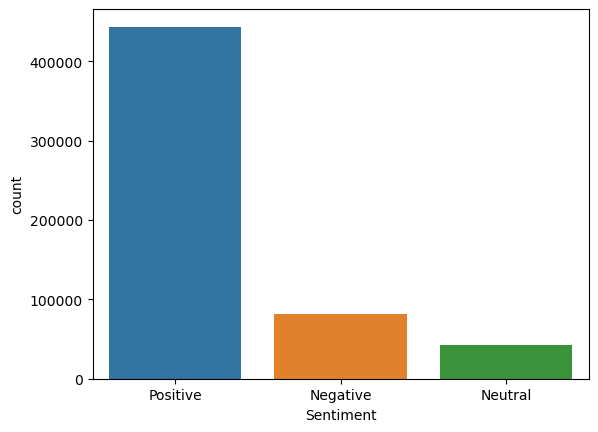%0A)

In \[27\]:

    df['Score'].value_counts()

Out\[27\]:

    5    363066
    4     80637
    1     52245
    3     42634
    2     29739
    Name: Score, dtype: int64

In \[28\]:

    sns.countplot(x='Score', data=df)

Out\[28\]:

    <Axes: xlabel='Score', ylabel='count'>

![](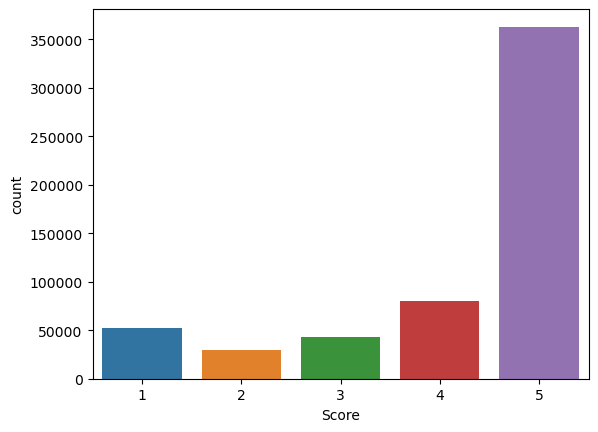%0A)

In \[29\]:

    sns.countplot(x='Sentiment', hue='Score', data=df)

Out\[29\]:

    <Axes: xlabel='Sentiment', ylabel='count'>

![](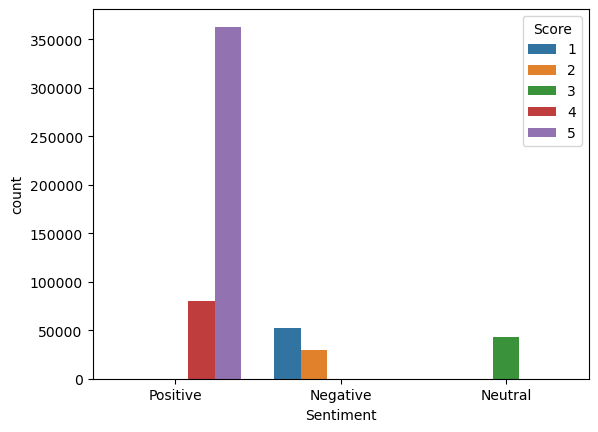%0A)

In \[30\]:

    df.head(2)

Out\[30\]:

|     | ProductId  | UserId         | ProfileName   | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary         | ReviewText                                        | Helpfulness | Sentiment |
|-----|------------|----------------|---------------|----------------------|------------------------|-------|------------|-----------------------|---------------------------------------------------|-------------|-----------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian    | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food | I have bought several of the Vitality canned d... | 1.0         | Positive  |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food      | This is a very healthy dog food. Good for thei... | 0.0         | Positive  |

In \[31\]:

    df['Helpfulness'].value_counts()

Out\[31\]:

    1.0    298324
    0.0    269997
    Name: Helpfulness, dtype: int64

In \[32\]:

    df.columns

Out\[32\]:

    Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
           'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
           'ReviewText', 'Helpfulness', 'Sentiment'],
          dtype='object')

## Word Cloud for the negative reviews<a href="#Word-Cloud-for-the-negative-reviews" class="anchor-link">¶</a>

In \[34\]:

    !pip install wordcloud

    Defaulting to user installation because normal site-packages is not writeable
    Requirement already satisfied: wordcloud in c:\users\syeda\appdata\roaming\python\python310\site-packages (1.9.3)
    Requirement already satisfied: pillow in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (9.4.0)
    Requirement already satisfied: matplotlib in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (3.7.0)
    Requirement already satisfied: numpy>=1.6.1 in c:\programdata\anaconda3\lib\site-packages (from wordcloud) (1.23.5)
    Requirement already satisfied: python-dateutil>=2.7 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (2.8.2)
    Requirement already satisfied: pyparsing>=2.3.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (3.0.9)
    Requirement already satisfied: fonttools>=4.22.0 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (4.25.0)
    Requirement already satisfied: cycler>=0.10 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (0.11.0)
    Requirement already satisfied: kiwisolver>=1.0.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.4.4)
    Requirement already satisfied: packaging>=20.0 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (22.0)
    Requirement already satisfied: contourpy>=1.0.1 in c:\programdata\anaconda3\lib\site-packages (from matplotlib->wordcloud) (1.0.5)
    Requirement already satisfied: six>=1.5 in c:\programdata\anaconda3\lib\site-packages (from python-dateutil>=2.7->matplotlib->wordcloud) (1.16.0)

In \[35\]:

    df['Helpfulness'].value_counts()

Out\[35\]:

    1.0    298324
    0.0    269997
    Name: Helpfulness, dtype: int64

In \[36\]:

    words = ' '.join(df['ReviewText'])

    print(words[:2000])

    I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding. I fed this to my Golden Retriever and he hated it.  He wouldn't eat it, and when he did, it gave him terrible diarrhea.  We will not be buying this again.  It's also super expensive. I have to admit, I was a sucker for the large quantity, 12 oz, when shopping for hot sauces ...but now seeing the size of the bottle, it reminds of wing-sauce bottle sizes.  Plastic bottle.  It does have a convenient squirt top.  But overall, not very hot or tasty, and made mostly from jalape&ntilde;os.  If I had seen the ingredients list I would not have bought it We have a 7 week old... He had gas and constipation problems for the first 5 weeks. We tried two different kinds of similac including for fussiness and gas and neither seemed to work. We switched to the organic a few weeks ago and saw quick improvement. I wish I could breast feed but I'm unable to, so for now this seems the best option especially since it was recommended we stick with a ready made formula for the gas problems.<br />Ive read a lot of the reviews and took into consideration the information about sucrose. I plan on talking to the pediatrician and my midwife for additional information beyond the article written about it, especially since that is from 2008. I realize the concern and I am doing research on making my own formula so I know exactly whats in it and that its organic, but in the mean time baby L eats great with this, is healthy, and has fewer stomach problems. It's middle of the road when it comes to $ - although Amazn is one of the more expensive places!!! Target has the best price. So for now it works and I 

In \[37\]:

    from collections import Counter
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns

    # Assuming df is your DataFrame containing the 'ReviewText' column
    # Ensure all values in the 'ReviewText' column are strings and handle NaN values
    df['ReviewText'] = df['ReviewText'].astype(str)

    # Get all words in the text
    all_words = " ".join(df['ReviewText'].values).split()
    word_counts = Counter(all_words)

    # Get the most common words
    common_words = word_counts.most_common(20)

    # Convert to DataFrame for plotting
    common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

    # Plot the most common words
    sns.barplot(data=common_words_df, x='count', y='word')
    plt.title('Top 20 Most Frequent Words')
    plt.show()

![](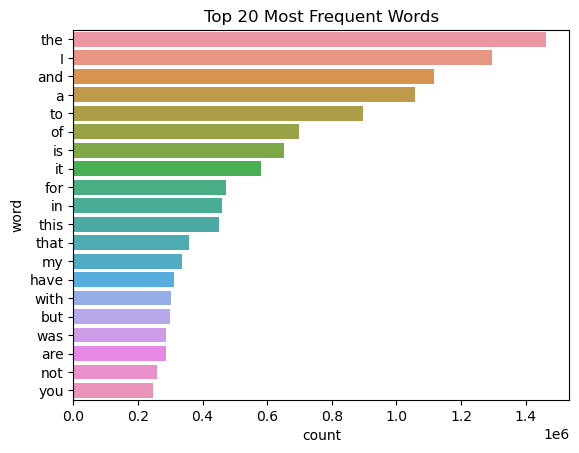%0A)

In \[38\]:

    %%time
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    # Generate word clouds for each score
    one_review = " ".join(df[df['Score'] == 1]['ReviewText'].astype(str).values)
    one_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(one_review)

    two_review = " ".join(df[df['Score'] == 2]['ReviewText'].astype(str).values)
    two_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(two_review)

    three_review = " ".join(df[df['Score'] == 3]['ReviewText'].astype(str).values)
    three_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(three_review)

    four_review = " ".join(df[df['Score'] == 4]['ReviewText'].astype(str).values)
    four_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(four_review)

    five_review = " ".join(df[df['Score'] == 5]['ReviewText'].astype(str).values)
    five_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(five_review)

    # Display the word clouds
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))
    ax = ax.flatten()

    ax[0].imshow(one_wordcloud, interpolation='bilinear')
    ax[0].axis('off')
    ax[0].set_title('One Star Word Cloud')

    ax[1].imshow(two_wordcloud, interpolation='bilinear')
    ax[1].axis('off')
    ax[1].set_title('Two Star Word Cloud')

    ax[2].imshow(three_wordcloud, interpolation='bilinear')
    ax[2].axis('off')
    ax[2].set_title('Three Star Word Cloud')

    ax[3].imshow(four_wordcloud, interpolation='bilinear')
    ax[3].axis('off')
    ax[3].set_title('Four Star Word Cloud')

    ax[4].imshow(five_wordcloud, interpolation='bilinear')
    ax[4].axis('off')
    ax[4].set_title('Five Star Word Cloud')

    # Remove the last subplot (empty one)
    fig.delaxes(ax[5])

    plt.tight_layout()
    plt.show()

![](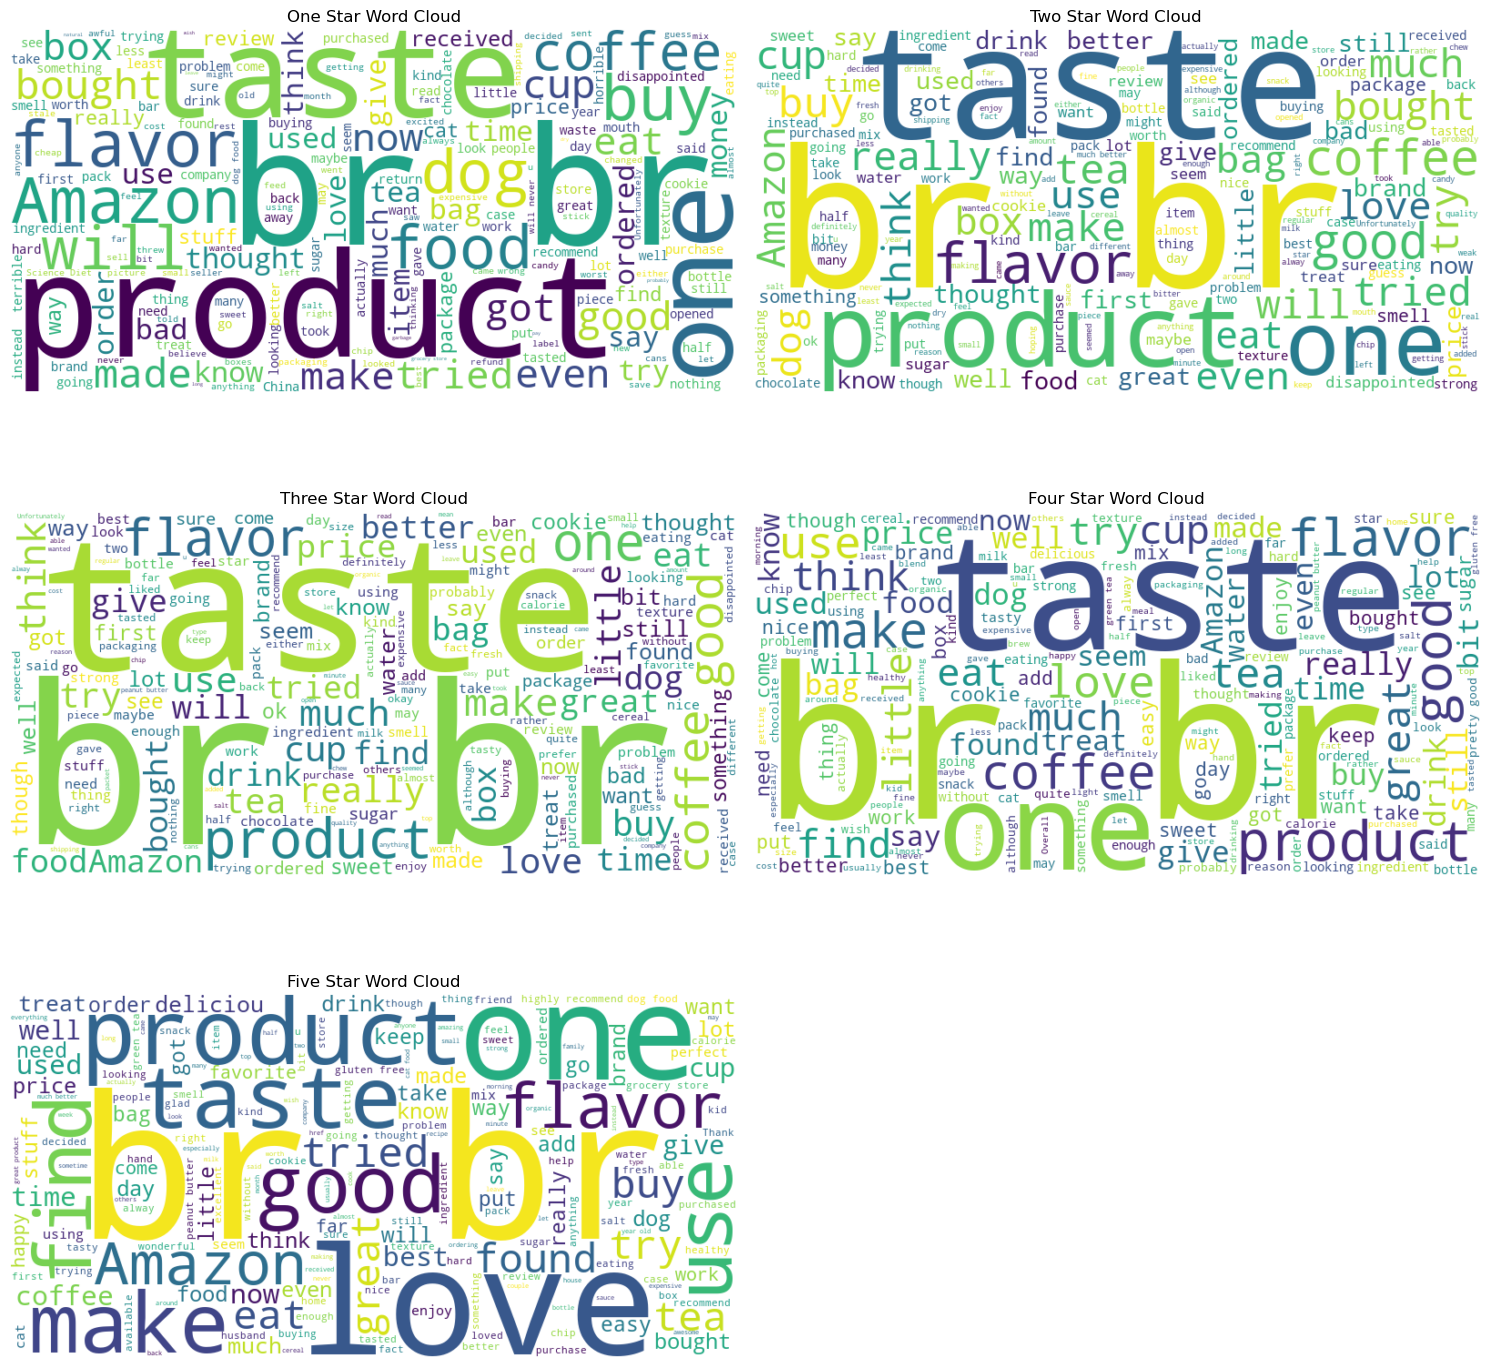%0A)

    CPU times: total: 1min 13s
    Wall time: 2min 7s

# 3. Data Preprocessing<a href="#3.-Data-Preprocessing" class="anchor-link">¶</a>

### Data exploration ends here. The next step will be preprocess the data in order to make the learning process more smooth.<a
href="#Data-exploration-ends-here.-The-next-step-will-be-preprocess-the-data-in-order-to-make-the-learning-process-more-smooth."
class="anchor-link">¶</a>

### Preprocessing steps:<a href="#Preprocessing-steps:" class="anchor-link">¶</a>

-   Removing special characters
-   Convert sentence into lower case
-   Remove Stop Words
-   Stemming or Lemmatization

In \[39\]:

    !pip install nltk

    Defaulting to user installation because normal site-packages is not writeable
    Requirement already satisfied: nltk in c:\programdata\anaconda3\lib\site-packages (3.7)
    Requirement already satisfied: tqdm in c:\programdata\anaconda3\lib\site-packages (from nltk) (4.64.1)
    Requirement already satisfied: regex>=2021.8.3 in c:\programdata\anaconda3\lib\site-packages (from nltk) (2022.7.9)
    Requirement already satisfied: click in c:\programdata\anaconda3\lib\site-packages (from nltk) (8.0.4)
    Requirement already satisfied: joblib in c:\programdata\anaconda3\lib\site-packages (from nltk) (1.1.1)
    Requirement already satisfied: colorama in c:\programdata\anaconda3\lib\site-packages (from click->nltk) (0.4.6)

In \[40\]:

    import nltk
    nltk.download('stopwords')

    [nltk_data] Downloading package stopwords to
    [nltk_data]     C:\Users\syeda\AppData\Roaming\nltk_data...
    [nltk_data]   Package stopwords is already up-to-date!

Out\[40\]:

    True

In \[55\]:

    import re
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer

In \[42\]:

    ## initialise the inbuilt Stemmer
    stemmer = PorterStemmer()

In \[43\]:

    # # We can also use Lemmatizer instead of Stemmer

    lemmatizer = WordNetLemmatizer()

In \[44\]:

    # initializing the lists

    clean_review_lst = []

    review_len_lst = []

In \[45\]:

    def preprocess(raw_review, flag):
        # Removing special characters and digits
        letters_only = re.sub("[^a-zA-Z]", " ",raw_review)
        
        # change sentence to lower case
        letters_only = letters_only.lower()

        # tokenize into words
        words = letters_only.split()
        
        # remove stop words                
        words = [w for w in words if not w in stopwords.words("english")]
        
        #Stemming/Lemmatization
        if(flag == 'stem'):
            words = [stemmer.stem(word) for word in words]
        else:
            words = [lemmatizer.lemmatize(word) for word in words]
        
        clean_review_lst.append(" ".join(words))
        
        review_len_lst.append(len(words))

Stemming makes sure that different variations of a word, say ‘warm’,
warmer’, ‘warming’ and ‘warmed,’ are represented by a single token -
‘warm’, because they all represent the same information (represented by
the 'stem' of the word).

In \[46\]:

    !pip install tqdm

    Defaulting to user installation because normal site-packages is not writeable
    Requirement already satisfied: tqdm in c:\programdata\anaconda3\lib\site-packages (4.64.1)
    Requirement already satisfied: colorama in c:\programdata\anaconda3\lib\site-packages (from tqdm) (0.4.6)

In \[47\]:

    from tqdm import tqdm, tqdm_notebook

    tqdm.pandas()

In \[48\]:

    df.columns

Out\[48\]:

    Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
           'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
           'ReviewText', 'Helpfulness', 'Sentiment'],
          dtype='object')

In \[50\]:

    df.head()

Out\[50\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness | Sentiment |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|-----------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         | Positive  |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | 0.0         | Positive  |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         | Negative  |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         | Negative  |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         | Positive  |

In \[56\]:

    import nltk
    nltk.download('wordnet')

    [nltk_data] Downloading package wordnet to
    [nltk_data]     C:\Users\syeda\AppData\Roaming\nltk_data...
    [nltk_data]   Package wordnet is already up-to-date!

Out\[56\]:

    True

In \[58\]:

    import nltk

    # Download the omw-1.4 resource
    nltk.download('omw-1.4')

    [nltk_data] Downloading package omw-1.4 to
    [nltk_data]     C:\Users\syeda\AppData\Roaming\nltk_data...

Out\[58\]:

    True

In \[59\]:

    clean_review_lst = []

    review_len_lst = []

    df['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemma'))

    df['clean_review_lemma'] = clean_review_lst

    df['review_length_lemma'] = review_len_lst

    100%|████████████████████████████████████████████████████████████████████████| 568321/568321 [7:19:05<00:00, 21.57it/s]

In \[ \]:

     

In \[62\]:

    df.head()

Out\[62\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness | Sentiment | clean_review_lemma                                | review_length_lemma |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|-----------|---------------------------------------------------|---------------------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         | Positive  | bought several vitality canned dog food produc... | 23                  |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | 0.0         | Positive  | healthy dog food good digestion also good smal... | 15                  |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         | Negative  | fed golden retriever hated eat gave terrible d... | 12                  |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         | Negative  | admit sucker large quantity oz shopping hot sa... | 34                  |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         | Positive  | week old gas constipation problem first week t... | 94                  |

# 4. Data Preparation<a href="#4.-Data-Preparation" class="anchor-link">¶</a>

### Preparation of data and build the model.<a href="#Preparation-of-data-and-build-the-model."
class="anchor-link">¶</a>

In \[63\]:

    # Preparing the target variable

    df['Sentiment'].apply(lambda x: 0 if x=='negative' else 1)

    df.head()

Out\[63\]:

|     | ProductId  | UserId         | ProfileName      | HelpfulnessNumerator | HelpfulnessDenominator | Score | Time       | ReviewSummary              | ReviewText                                        | Helpfulness | Sentiment | clean_review_lemma                                | review_length_lemma |
|-----|------------|----------------|------------------|----------------------|------------------------|-------|------------|----------------------------|---------------------------------------------------|-------------|-----------|---------------------------------------------------|---------------------|
| 0   | B001E4KFG0 | A3SGXH7AUHU8GW | delmartian       | 1                    | 1                      | 5     | 1303862400 | Good Quality Dog Food      | I have bought several of the Vitality canned d... | 1.0         | Positive  | bought several vitality canned dog food produc... | 23                  |
| 1   | B00171APVA | A21BT40VZCCYT4 | Carol A. Reed    | 0                    | 0                      | 5     | 1351209600 | Healthy Dog Food           | This is a very healthy dog food. Good for thei... | 0.0         | Positive  | healthy dog food good digestion also good smal... | 15                  |
| 2   | B0019CW0HE | A2P6ACFZ8FTNVV | Melissa Benjamin | 1                    | 1                      | 1     | 1331164800 | Bad                        | I fed this to my Golden Retriever and he hated... | 1.0         | Negative  | fed golden retriever hated eat gave terrible d... | 12                  |
| 3   | B006F2NYI2 | A132DJVI37RB4X | Scottdrum        | 5                    | 5                      | 2     | 1332374400 | Not hot, not habanero      | I have to admit, I was a sucker for the large ... | 1.0         | Negative  | admit sucker large quantity oz shopping hot sa... | 34                  |
| 4   | B000P41A28 | A82WIMR4RSVLI  | Emrose mom       | 1                    | 1                      | 4     | 1337472000 | The best weve tried so far | We have a 7 week old... He had gas and constip... | 1.0         | Positive  | week old gas constipation problem first week t... | 94                  |

In \[64\]:

    df['Sentiment'].value_counts()

Out\[64\]:

    Positive    443703
    Negative     81984
    Neutral      42634
    Name: Sentiment, dtype: int64

In \[65\]:

    # splitting into test and train

    from sklearn.model_selection  import train_test_split

    train, test = train_test_split(df,test_size=0.25,random_state=42)

In \[67\]:

    train_clean_review=[]
    for review in train['clean_review_lemma']:
        train_clean_review.append(review)

    test_clean_review=[]
    for review in test['clean_review_lemma']:
        test_clean_review.append(review)

## Text to numerical vector using Bag of Words<a href="#Text-to-numerical-vector-using-Bag-of-Words"
class="anchor-link">¶</a>

In \[68\]:

    #bag of words

In \[70\]:

    %%time
    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer(ngram_range=(1,2))

    train_features = vectorizer.fit_transform(train_clean_review)

    test_features = vectorizer.transform(test_clean_review)

    CPU times: total: 50.3 s
    Wall time: 1min 1s

In \[71\]:

    %%time
    vectorizer.vocabulary_

    CPU times: total: 0 ns
    Wall time: 0 ns

Out\[71\]:

    {'one': 1770015,
     'four': 1028125,
     'five': 977251,
     'variety': 2786159,
     'wellness': 2856572,
     'canned': 382124,
     'food': 1007815,
     'dog': 748929,
     'tried': 2698278,
     'first': 971449,
     'seemed': 2257415,
     'like': 1449874,
     'ate': 139536,
     'well': 2851823,
     'couple': 598208,
     'pack': 1824786,
     'can': 375092,
     'refused': 2110439,
     'eat': 797836,
     'flavor': 982605,
     'given': 1095817,
     'time': 2644718,
     'knew': 1386508,
     'part': 1849661,
     'meal': 1576594,
     'know': 1388290,
     'happened': 1186062,
     'menu': 1594622,
     'longer': 1491528,
     'one four': 1772325,
     'four five': 1028379,
     'five variety': 977781,
     'variety wellness': 2788185,
     'wellness canned': 2856619,
     'canned food': 382355,
     'food dog': 1009226,
     'dog tried': 752309,
     'tried first': 2699766,
     'first seemed': 973738,
     'seemed like': 2257904,
     'like ate': 1450302,
     'ate well': 140649,
     'well couple': 2852807,
     'couple pack': 598891,
     'pack can': 1825114,
     'can refused': 376255,
     'refused eat': 2110486,
     'eat flavor': 798887,
     'flavor given': 984941,
     'given time': 1096921,
     'time knew': 2647133,
     'knew part': 1387019,
     'part meal': 1850769,
     'meal know': 1577480,
     'know happened': 1389717,
     'happened menu': 1186394,
     'menu longer': 1594709,
     'syrup': 2548552,
     'top': 2669552,
     'quality': 2042415,
     'great': 1142749,
     'price': 1980154,
     'went': 2857074,
     'much': 1661887,
     'lower': 1517494,
     'shame': 2287719,
     'would': 2905077,
     'buying': 355085,
     'regularly': 2114810,
     'none': 1715346,
     'le': 1419035,
     'syrup top': 2550222,
     'top quality': 2670991,
     'quality great': 2043453,
     'great price': 1146261,
     'price well': 1983444,
     'well went': 2856369,
     'went much': 2857967,
     'much lower': 1664170,
     'lower price': 1517896,
     'price shame': 1982784,
     'shame would': 2288162,
     'would like': 2906969,
     'like buying': 1450950,
     'buying regularly': 356741,
     'regularly well': 2115399,
     'well great': 2853664,
     'great syrup': 1147349,
     'syrup none': 2549634,
     'none le': 1715843,
     'easy': 796114,
     'fix': 977826,
     'tomato': 2663516,
     'chicken': 449059,
     'pork': 1943911,
     'shrimp': 2312439,
     'seasoning': 2245147,
     'flavorful': 990479,
     'rice': 2158342,
     'cook': 574679,
     'nicely': 1708982,
     'unlike': 2750086,
     'instant': 1316385,
     'odd': 1749655,
     'extruded': 905660,
     'look': 1493422,
     'feel': 942012,
     'quite': 2052659,
     'salty': 2205816,
     'though': 2629407,
     'using': 2773393,
     'sodium': 2373585,
     'free': 1032694,
     'course': 599859,
     'salting': 2205750,
     'water': 2831589,
     'box': 287434,
     'order': 1790113,
     'due': 783528,
     'excessive': 883698,
     'taste': 2567249,
     'easy fix': 796644,
     'fix tomato': 978438,
     'tomato chicken': 2663668,
     'chicken pork': 450182,
     'pork shrimp': 1944291,
     'shrimp seasoning': 2312776,
     'seasoning flavorful': 2245559,
     'flavorful rice': 991369,
     'rice cook': 2158692,
     'cook nicely': 575461,
     'nicely unlike': 1709788,
     'unlike instant': 2750483,
     'instant rice': 1316924,
     'rice odd': 2159453,
     'odd extruded': 1749805,
     'extruded look': 905670,
     'look feel': 1494018,
     'feel quite': 943247,
     'quite salty': 2054016,
     'salty though': 2206856,
     'though salty': 2631475,
     'salty like': 2206385,
     'like using': 1458898,
     'using sodium': 2776042,
     'sodium free': 2373895,
     'free tomato': 1035170,
     'tomato course': 2663722,
     'course salting': 601105,
     'salting water': 2205778,
     'water eat': 2832606,
     'eat box': 798137,
     'box order': 289951,
     'order due': 1790959,
     'due excessive': 783973,
     'excessive salty': 883830,
     'salty taste': 2206830,
     'drink': 770059,
     'hard': 1190193,
     'workout': 2897892,
     'mixed': 1631440,
     'fantastic': 921774,
     'filling': 955797,
     'also': 67452,
     'mix': 1627987,
     'scoop': 2235360,
     'lowfat': 1518335,
     'almond': 58952,
     'milk': 1608805,
     'natural': 1681227,
     'peanut': 1867593,
     'butter': 347491,
     'banana': 181177,
     'ice': 1271843,
     'healthy': 1204045,
     'lunch': 1521226,
     'oatmeal': 1742721,
     'egg': 814026,
     'white': 2867037,
     'make': 1536753,
     'excellent': 879344,
     'protein': 2013653,
     'pancake': 1843437,
     'sold': 2377959,
     'click': 487208,
     'drink hard': 771403,
     'hard workout': 1191922,
     'workout mixed': 2898154,
     'mixed water': 1632721,
     'water fantastic': 2832761,
     'fantastic great': 922244,
     'great taste': 1147396,
     'taste filling': 2569147,
     'filling also': 955822,
     'also mix': 69905,
     'mix one': 1630045,
     'one scoop': 1775174,
     'scoop lowfat': 2235654,
     'lowfat almond': 1518337,
     'almond milk': 59562,
     'milk natural': 1610259,
     'natural almond': 1681268,
     'almond peanut': 59667,
     'peanut butter': 1867715,
     'butter banana': 347627,
     'banana ice': 181510,
     'ice healthy': 1272142,
     'healthy lowfat': 1205139,
     'lowfat lunch': 1518360,
     'lunch mixed': 1521770,
     'mixed oatmeal': 1632205,
     'oatmeal egg': 1743041,
     'egg white': 815127,
     'white banana': 2867101,
     'banana make': 181562,
     'make excellent': 1538170,
     'excellent protein': 880657,
     'protein pancake': 2014531,
     'pancake sold': 1843996,
     'sold click': 2378152,
     'click protein': 487377,
     'protein drink': 2014042,
     'ordered': 1793344,
     'item': 1338795,
     'dasuquin': 654086,
     'glucosamine': 1102335,
     'soft': 2374585,
     'chew': 443658,
     'recommend': 2095550,
     'product': 1998449,
     'mom': 1641510,
     'dad': 646561,
     'lamb': 1403930,
     'jerky': 1349954,
     'zukes': 2938832,
     'love': 1506082,
     'broken': 326643,
     'treat': 2691231,
     'cracker': 605419,
     'happy': 1188034,
     'hip': 1230014,
     'bag': 169075,
     'piece': 1902184,
     'disappointed': 728369,
     'gobble': 1108951,
     'picky': 1899256,
     'come': 518924,
     'snack': 2363742,
     'however': 1258070,
     'put': 2037270,
     'cookie': 577536,
     'jar': 1345318,
     'size': 2335579,
     'sorry': 2394109,
     'could': 592868,
     'oh': 1756919,
     'end': 828126,
     'world': 2898436,
     'little': 1475318,
     'thankful': 2610020,
     'find': 959505,
     'deal': 662912,
     'ordered item': 1794549,
     'item dasuquin': 1339324,
     'dasuquin glucosamine': 654092,
     'glucosamine soft': 1102428,
     'soft chew': 2374761,
     'chew would': 445275,
     'would recommend': 2907736,
     'recommend product': 2097143,
     'product dog': 2000263,
     'dog mom': 750997,
     'mom dad': 1641704,
     'dad lamb': 646748,
     'lamb jerky': 1404072,
     'jerky zukes': 1350976,
     'zukes dog': 2938843,
     'dog love': 750847,
     'love broken': 1506722,
     'broken treat': 327469,
     'treat cracker': 2691918,
     'cracker happy': 606076,
     'happy hip': 1188809,
     'hip lamb': 1230150,
     'lamb rice': 1404160,
     'rice bag': 2158459,
     'bag piece': 171924,
     'piece disappointed': 1902719,
     'disappointed course': 728685,
     'course dog': 600272,
     'dog gobble': 750279,
     'gobble picky': 1109117,
     'picky come': 1899381,
     'come snack': 521398,
     'snack love': 2365001,
     'love treat': 1511706,
     'treat however': 2692743,
     'however like': 1259547,
     'like put': 1456521,
     'put cookie': 2037782,
     'cookie jar': 578240,
     'jar treat': 1347132,
     'treat size': 2694008,
     'size sorry': 2337625,
     'sorry picky': 2394547,
     'picky could': 1899393,
     'could put': 594456,
     'put treat': 2039815,
     'treat jar': 2692866,
     'jar broken': 1345514,
     'broken oh': 327160,
     'oh well': 1757643,
     'well end': 2853206,
     'end world': 829909,
     'world little': 2899059,
     'little disappointed': 1476466,
     'disappointed great': 728982,
     'price product': 1982426,
     'product thankful': 2004587,
     'thankful find': 2610074,
     'find deal': 960472,
     'deal dog': 663321,
     'dog snack': 751917,
     'looked': 1495282,
     'delightful': 684395,
     'easter': 795844,
     'grandchild': 1135425,
     'hunt': 1266246,
     'sunday': 2516043,
     'believe': 215073,
     'disappointment': 730616,
     'child': 451626,
     'bad': 166306,
     'gas': 1067762,
     'fixing': 978769,
     'brach': 304395,
     'looked delightful': 1495520,
     'delightful easter': 684515,
     'easter egg': 795898,
     'egg grandchild': 814435,
     'grandchild hunt': 1135496,
     'hunt sunday': 1266425,
     'sunday believe': 2516056,
     'believe buying': 215238,
     'buying disappointment': 355611,
     'disappointment child': 730685,
     'child bad': 451716,
     'bad gas': 167173,
     'gas price': 1068193,
     'price fixing': 1981287,
     'fixing shame': 978832,
     'shame brach': 2287760,
     'good': 1115551,
     'quantity': 2045225,
     'listed': 1471892,
     'discription': 736309,
     'product good': 2001087,
     'good disappointed': 1117072,
     'disappointed quantity': 729508,
     'quantity price': 2045846,
     'price quantity': 1982478,
     'quantity listed': 2045691,
     'listed product': 1472457,
     'product discription': 2000202,
     'eating': 803296,
     'discovering': 735864,
     'real': 2075783,
     'pineapple': 1907221,
     'fresh': 1038247,
     'field': 950304,
     'hawaii': 1197902,
     'warning': 2826376,
     'spoil': 2420563,
     'run': 2187714,
     'mill': 1611725,
     'limit': 1463522,
     'handful': 1182396,
     'daily': 647153,
     'even': 860850,
     'ordering': 1796037,
     'looking': 1496273,
     'virginia': 2805445,
     'local': 1484834,
     'ralph': 2058682,
     'grocery': 1157148,
     'store': 2473336,
     'stopped': 2472154,
     'carrying': 399594,
     'brand': 305836,
     'labeled': 1400120,
     'viginia': 2802910,
     'close': 488960,
     'eating peanut': 805049,
     'peanut like': 1868145,
     'like discovering': 1452209,
     'discovering real': 735973,
     'real pineapple': 2076973,
     'pineapple taste': 1907595,
     'taste fresh': 2569284,
     'fresh field': 1038966,
     'field hawaii': 950397,
     'hawaii warning': 1198222,
     'warning peanut': 2826660,
     'peanut spoil': 1868512,
     'spoil run': 2420688,
     'run mill': 2188483,
     'mill peanut': 1612123,
     'peanut limit': 1868148,
     'limit couple': 1463580,
     'couple handful': 598649,
     'handful daily': 1182495,
     'daily even': 647455,
     'even find': 862369,
     'find ordering': 962205,
     'ordering pack': 1796879,
     'pack went': 1827509,
     'went looking': 2857871,
     'looking virginia': 1498487,
     'virginia peanut': 2805514,
     'peanut local': 1868154,
     'local ralph': 1485613,
     'ralph grocery': 2058698,
     'grocery store': 1157724,
     'store stopped': 2476375,
     'stopped carrying': 2472222,
     'carrying ralph': 400128,
     'ralph brand': 2058690,
     'brand even': 306936,
     'even though': 865133,
     'though labeled': 2630698,
     'labeled viginia': 1400526,
     'viginia peanut': 2802912,
     'peanut even': 1867922,
     'even close': 861593,
     'close product': 489937,
     'hi': 1223895,
     'bean': 199143,
     'roast': 2171732,
     'step': 2455446,
     'average': 149513,
     'point': 1931890,
     'darkness': 653311,
     'expected': 889999,
     'seems': 2258534,
     'lot': 1501876,
     'ambiguity': 85867,
     'french': 1036868,
     'gauge': 1069470,
     'true': 2706567,
     'meaning': 1580293,
     'fall': 915208,
     'category': 408872,
     'italian': 1337244,
     'truly': 2708685,
     'darker': 652969,
     'majority': 1536445,
     'past': 1856654,
     'mind': 1613758,
     'dark': 651960,
     'br': 293767,
     'remember': 2122516,
     'thing': 2618546,
     'espresso': 854667,
     'blend': 255478,
     'job': 1352666,
     'producing': 1998207,
     'smooth': 2360481,
     'pull': 2021523,
     'every': 869564,
     'far': 923115,
     'need': 1689197,
     'grind': 1154079,
     'finer': 966990,
     'mild': 1606835,
     'expect': 888160,
     'caffeine': 360584,
     'high': 1225215,
     'second': 2247254,
     'shot': 2308131,
     'gaggia': 1063072,
     'classic': 480898,
     'virtuosa': 2805838,
     'percisio': 1880220,
     'grinder': 1154747,
     'setting': 2282102,
     'tamping': 2562402,
     'rattleware': 2068372,
     'mm': 1634771,
     'tamper': 2562326,
     'roughly': 2182855,
     'lb': 1417689,
     'applied': 114602,
     'pressure': 1975477,
     'puck': 2019397,
     'said': 2195688,
     'enjoy': 835354,
     'strong': 2486073,
     'bold': 267514,
     'wonderful': 2887502,
     'machiottos': 1526716,
     'dupio': 787053,
     'watching': 2831161,
     'shortly': 2307984,
     'bean quality': 200828,
     'quality roast': 2044389,
     'roast quality': 2172688,
     'quality bean': 2042604,
     'bean step': 201217,
     'step average': 2455479,
     'average bean': 149549,
     'bean price': 200784,
     'price point': 1982349,
     'point darkness': 1932193,
     'darkness little': 653328,
     'little expected': 1476705,
     'expected seems': 891038,
     'seems lot': 2259525,
     'lot ambiguity': 1501944,
     'ambiguity buying': 85868,
     'buying french': 355829,
     'french roast': 1037157,
     'roast much': 2172501,
     'much hard': 1663663,
     'hard gauge': 1190827,
     'gauge true': 1069506,
     'true meaning': 2707300,
     'meaning darkness': 1580365,
     'darkness bean': 653313,
     'bean fall': 199911,
     'fall category': 915286,
     'category italian': 409015,
     'italian roast': 1337664,
     'roast truly': 2172992,
     'truly darker': 2708868,
     'darker majority': 653109,
     'majority french': 1536541,
     'roast tried': 2172990,
     'tried past': 2701173,
     'past mind': 1857258,
     'mind labeled': 1614397,
     'labeled dark': 1400219,
     'dark french': 652301,
     'roast br': 2171869,
     'br br': 294833,
     'br remember': 301474,
     'remember thing': 2123526,
     'thing espresso': 2619574,
     'espresso roast': 855370,
     'roast blend': 2171850,
     'blend bean': 255615,
     'bean great': 200093,
     'great job': 1145201,
     'job producing': 1353299,
     'producing quality': 1998360,
     'quality smooth': 2044559,
     'smooth espresso': 2360865,
     'espresso pull': 855320,
     'pull every': 2021659,
     'every time': 870824,
     'time far': 2646305,
     'far need': 924424,
     'need grind': 1690346,
     'grind lot': 1154398,
     'lot finer': 1502841,
     'finer would': 967129,
     'would mild': 2907128,
     'mild bean': 1606914,
     'bean expect': 199878,
     'expect caffeine': 888320,
     'caffeine quality': 361296,
     'quality high': 2043529,
     'high darker': 1225526,
     'darker bean': 652981,
     'bean lower': 200413,
     'lower caffeine': 1517561,
     'caffeine pull': 361289,
     'pull second': 2021899,
     'second shot': 2248433,
     'shot gaggia': 2308437,
     'gaggia classic': 1063075,
     'classic using': 481472,
     'using virtuosa': 2776545,
     'virtuosa percisio': 2805839,
     'percisio grinder': 1880221,
     'grinder setting': 1155112,
     'setting tamping': 2282575,
     'tamping rattleware': 2562416,
     'rattleware mm': 2068373,
     'mm tamper': 1634827,
     'tamper roughly': 2562340,
     'roughly lb': 2182934,
     'lb applied': 1417739,
     'applied pressure': 114725,
     'pressure puck': 1975794,
     'puck taste': 2019534,
     'taste said': 2571551,
     'said smooth': 2197545,
     'smooth enjoy': 2360856,
     'enjoy strong': 837405,
     'strong bold': 2486267,
     'bold espresso': 267716,
     'espresso drink': 854910,
     'drink make': 771785,
     'make wonderful': 1541484,
     'wonderful machiottos': 2888639,
     'machiottos dupio': 1526717,
     'dupio espresso': 787054,
     'espresso though': 855511,
     'though watching': 2632090,
     'watching shot': 2831485,
     'shot bean': 2308187,
     'bean shortly': 201073,
     'arrived': 127149,
     'going': 1110292,
     'superbowl': 2518110,
     'batch': 194535,
     'paul': 1862859,
     'newman': 1703184,
     'concord': 545759,
     'grape': 1138544,
     'apple': 112885,
     'cider': 474265,
     'perfect': 1880393,
     'give': 1092764,
     'gift': 1087948,
     'college': 511030,
     'student': 2490531,
     'renaissance': 2127823,
     'man': 1547332,
     'wanna': 2819150,
     'hobo': 1232706,
     'aspiring': 135889,
     'home': 1236257,
     'brewer': 320089,
     'middle': 1603734,
     'school': 2233643,
     'science': 2234542,
     'fair': 913297,
     'project': 2007898,
     'bbq': 197749,
     'setup': 2283236,
     'maintenance': 1535775,
     'keeping': 1368048,
     'mine': 1615242,
     'warm': 2824525,
     'research': 2137370,
     'brewing': 320647,
     'tip': 2653003,
     'maximize': 1570080,
     'result': 2145701,
     'try': 2711026,
     'concoction': 545514,
     'fruit': 1049624,
     'see': 2250398,
     'versatility': 2797264,
     'vapor': 2785320,
     'lock': 1487423,
     'reuse': 2151203,
     'later': 1411592,
     'check': 434312,
     'tube': 2718423,
     'review': 2151947,
     'others': 1805238,
     'everyone': 871907,
     'buy': 350775,
     'mean': 1578636,
     'value': 2782258,
     'making': 1542948,
     'gallon': 1063941,
     'wine': 2875667,
     'buck': 333730,
     'plus': 1927455,
     'whatever': 2860415,
     'juice': 1357713,
     'costco': 591063,
     'two': 2728329,
     'math': 1568275,
     'alot': 65030,
     'boxed': 291701,
     'ingredient': 1307322,
     'brew': 318228,
     'supply': 2522306,
     'keep': 1365452,
     'experimenting': 897622,
     'recipe': 2092268,
     'product arrived': 1998761,
     'arrived time': 128322,
     'time going': 2646614,
     'going superbowl': 1112213,
     'superbowl batch': 2518111,
     'batch paul': 195334,
     'paul newman': 1862908,
     'newman concord': 1703276,
     'concord grape': 545766,
     'grape apple': 1138562,
     'apple cider': 113050,
     'cider perfect': 474500,
     'perfect give': 1881267,
     'give gift': 1093837,
     'gift college': 1088182,
     'college student': 511304,
     'student renaissance': 2490785,
     'renaissance man': 2127828,
     'man wanna': 1547887,
     'wanna hobo': 2819187,
     'hobo aspiring': 1232708,
     'aspiring home': 135895,
     'home brewer': 1236473,
     'brewer middle': 320388,
     'middle school': 1604177,
     'school science': 2234187,
     'science fair': 2234582,
     'fair project': 913659,
     'project bbq': 2007914,
     'bbq easy': 197834,
     'easy setup': 797407,
     'setup maintenance': 2283270,
     'maintenance keeping': 1535830,
     'keeping mine': 1368392,
     'mine warm': 1616531,
     'warm research': 2825091,
     'research home': 2137673,
     'home brewing': 1236474,
     'brewing tip': 321277,
     'tip maximize': 2653327,
     'maximize result': 1570099,
     'result wanna': 2147200,
     'wanna try': 2819236,
     'try concoction': 2711793,
     'concoction local': 545634,
     'local fruit': 1485207,
     'fruit see': 1051010,
     'see versatility': 2253070,
     'versatility product': 2797307,
     'product come': 1999583,
     'come vapor': 521876,
     'vapor lock': 2785335,
     'lock reuse': 1487539,
     'reuse later': 2151248,
     'later brewing': 1411723,
     'brewing project': 321108,
     'project check': 2007930,
     'check tube': 435134,
     'tube review': 2718708,
     'review others': 2153699,
     'others everyone': 1805709,
     'everyone seems': 872681,
     'seems happy': 2259296,
     'happy buy': 1188240,
     'buy mean': 352892,
     'mean look': 1579490,
     'look value': 1495174,
     'value making': 2782892,
     'making gallon': 1543720,
     'gallon wine': 1064382,
     'wine buck': 2875772,
     'buck plus': 334140,
     'plus whatever': 1929084,
     'whatever juice': 2860791,
     'juice find': 1358322,
     'find costco': 960355,
     'costco buck': 591131,
     'buck two': 334294,
     'two gallon': 2729340,
     'gallon good': 1064097,
     'good math': 1118830,
     'math know': 1568361,
     'know alot': 1388376,
     'alot le': 65392,
     'le boxed': 1419296,
     'boxed wine': 291937,
     'wine deal': 2875882,
     'deal ingredient': 663657,
     'ingredient local': 1308793,
     'local brew': 1484941,
     'brew supply': 319270,
     'supply store': 2523038,
     'store keep': 2475012,
     'keep experimenting': 1366192,
     'experimenting variety': 897803,
     'variety recipe': 2787656,
     'earl': 790832,
     'grey': 1152356,
     'stash': 2447391,
     'tea': 2582542,
     'delicious': 680319,
     'fragrant': 1030145,
     'ever': 867252,
     'enjoyed': 838257,
     'floral': 997221,
     'overpoweringly': 1818148,
     'sweet': 2536789,
     'distinctive': 744845,
     'herbal': 1221250,
     'similarly': 2321866,
     'harsh': 1194326,
     'black': 251175,
     'must': 1672521,
     'low': 1516427,
     'experience': 894767,
     'spike': 2416371,
     'either': 816047,
     'pleased': 1923306,
     'blend earl': 256018,
     'earl grey': 790852,
     'grey stash': 1152832,
     'stash tea': 2447757,
     'tea delicious': 2583715,
     'delicious fragrant': 681263,
     'fragrant earl': 1030232,
     'grey ever': 1152529,
     'ever enjoyed': 867862,
     'enjoyed blend': 838366,
     'blend floral': 256171,
     'floral quality': 997354,
     'quality overpoweringly': 2044067,
     'overpoweringly sweet': 1818178,
     'sweet quite': 2538736,
     'quite distinctive': 2053126,
     'distinctive herbal': 744930,
     'herbal br': 1221277,
     'br taste': 303040,
     'taste similarly': 2571763,
     'similarly floral': 2321894,
     'floral harsh': 997300,
     'harsh black': 1194349,
     'black tea': 252130,
     'tea flavor': 2584281,
     'flavor must': 986229,
     'must low': 1673403,
     'low caffeine': 1516543,
     'caffeine experience': 360888,
     'experience spike': 896101,
     'spike either': 2416426,
     'either br': 816217,
     'br distinctive': 296476,
     'distinctive blend': 744867,
     'blend stash': 257170,
     'stash pleased': 2447675,
     'found': 1023463,
     'smart': 2354414,
     'sugar': 2506808,
     'grocer': 1156773,
     'year': 2918870,
     'ago': 43932,
     'better': 227769,
     'replacement': 2130984,
     'nothing': 1724777,
     'else': 820959,
     'unfortunately': 2744495,
     'carried': 397147,
     'business': 345871,
     'amazon': 82032,
     'carry': 398250,
     'found smart': 1026894,
     'smart sugar': 2354631,
     'sugar local': 2508484,
     'local grocer': 1485257,
     'grocer one': 1156977,
     'one year': 1776783,
     'year ago': 2918934,
     'ago much': 45005,
     'much better': 1662231,
     'better sugar': 231523,
     'sugar replacement': 2509185,
     'replacement try': 2131840,
     'try see': 2714279,
     'see nothing': 2252050,
     'nothing else': 1725233,
     'else sugar': 822283,
     'replacement come': 2131147,
     'come close': 519407,
     'product unfortunately': 2004870,
     'unfortunately grocer': 2745002,
     'grocer carried': 1156815,
     'carried longer': 397384,
     'longer business': 1491716,
     'business looking': 346164,
     'looking hard': 1497189,
     'hard find': 1190764,
     'find local': 961710,
     'local grocery': 1485259,
     'store good': 2474654,
     'good thing': 1121134,
     'thing amazon': 2618643,
     'amazon carry': 82522,
     'purchased': 2029332,
     'take': 2556156,
     'trip': 2703539,
     'thailand': 2608629,
     'want': 2819263,
     'liquid': 1469027,
     'spray': 2424626,
     'luggage': 1520550,
     'kept': 1369758,
     'ziploc': 2937691,
     'safe': 2193894,
     'side': 2315222,
     'problem': 1991112,
     'leak': 1424074,
     'worked': 2895848,
     'used': 2767865,
     'get': 1077648,
     'bit': 243234,
     'mosquito': 1652490,
     'use': 2762467,
     'ask': 132714,
     'purchased take': 2031487,
     'take trip': 2558342,
     'trip thailand': 2704362,
     'thailand want': 2608830,
     'want lot': 2820663,
     'lot liquid': 1503429,
     'liquid spray': 1469983,
     'spray luggage': 2424873,
     'luggage kept': 1520575,
     'kept ziploc': 1370554,
     'ziploc bag': 2937694,
     'bag safe': 172438,
     'safe side': 2194401,
     'side problem': 2316352,
     'problem leak': 1992512,
     'leak worked': 1424377,
     'worked expected': 2896084,
     'expected used': 891254,
     'used get': 2769543,
     'get bit': 1078128,
     'bit mosquito': 245222,
     'mosquito use': 1652561,
     'use could': 2763524,
     'could ask': 592982,
     'consider': 552081,
     'something': 2383581,
     'cereal': 417415,
     'snob': 2369287,
     'favorite': 933748,
     'sweetener': 2540491,
     'accepts': 6048,
     'require': 2134915,
     'consider something': 552808,
     'something cereal': 2383945,
     'cereal snob': 419126,
     'snob one': 2369485,
     'one favorite': 1772141,
     'favorite sweet': 936179,
     'sweet need': 2538377,
     'need sweetener': 1691801,
     'sweetener perfect': 2541245,
     'perfect accepts': 1880400,
     'accepts fruit': 6053,
     'fruit well': 1051386,
     'well require': 2855207,
     'require give': 2135040,
     'give wonderful': 1095738,
     'wonderful flavor': 2888247,
     'thought': 2632196,
     'organic': 1798833,
     'barley': 187843,
     'href': 1261391,
     'http': 1261481,
     'thought newman': 2633491,
     'newman organic': 1703493,
     'organic lamb': 1799918,
     'lamb barley': 1403947,
     'barley dog': 187928,
     'dog treat': 752304,
     'treat like': 2692979,
     'like href': 1453898,
     'href http': 1261392,
     'smell': 2355320,
     'flavored': 989037,
     'glad': 1098394,
     'ran': 2059506,
     'purchase': 2027099,
     'pumpkin': 2023758,
     'spice': 2412408,
     'flavor smell': 987651,
     'smell great': 2356068,
     'taste like': 2570139,
     'like flavored': 1452953,
     'flavored water': 990394,
     'water glad': 2832983,
     'glad ran': 1099042,
     'ran purchase': 2059930,
     'purchase taste': 2029048,
     'like pumpkin': 1456485,
     'pumpkin spice': 2024268,
     'convenience': 571590,
     'shipped': 2299692,
     'door': 757476,
     'family': 916885,
     'love convenience': 1507264,
     'convenience shipped': 572088,
     'shipped door': 2299926,
     'door family': 757712,
     'family love': 917785,
     'love product': 1510287,
     'adopted': 31132,
     'month': 1646163,
     'old': 1764446,
     ...}

In \[73\]:

    print("Total unique words:", len(vectorizer.vocabulary_))

    print("Type of train_features:", type(train_features))

    print("Shape of input data", train_features.shape)

    Total unique words: 2939013
    Type of train_features: <class 'scipy.sparse._csr.csr_matrix'>
    Shape of input data (426240, 2939013)

# 5. Model Building and Evaluation<a href="#5.-Model-Building-and-Evaluation" class="anchor-link">¶</a>

In \[74\]:

    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import MultinomialNB

    from sklearn.metrics import accuracy_score

In \[75\]:

    Classifiers = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        MultinomialNB()  
    ]

In \[ \]:

    %%time
    for classifier in Classifiers:
        model = classifier.fit(train_features,train['Sentiment'])
        pred = model.predict(test_features)
        accuracy = accuracy_score(pred,test['Sentiment'])
        print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))   

In \[ \]:

     

In \[ \]:

    Classifiers = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        MultinomialNB()
    ]

    for classifier in Classifiers:
        start_time = time.time()  # Start time
        
        # Fit the model
        model = classifier.fit(train_features, train['Sentiment'])
        
        # Predict
        pred = model.predict(test_features)
        
        end_time = time.time()  # End time
        
        # Calculate accuracy
        accuracy = accuracy_score(test['Sentiment'], pred)
        
        # Calculate elapsed time
        elapsed_time = end_time - start_time
        
        print(f'Accuracy of {classifier.__class__.__name__} is {accuracy:.4f} and it took {elapsed_time:.4f} seconds')

# Saving the Model and Vectorizer in Pickle<a href="#Saving-the-Model-and-Vectorizer-in-Pickle"
class="anchor-link">¶</a>

In \[ \]:

    model = LogisticRegression()

    model.fit(train_features,train['sentiment'])

In \[ \]:

    from pickle import dump

    dump(vectorizer, open('pickle/countvectorizer.pkl', 'wb'))

    dump(model, open('pickle/logit_model.pkl', 'wb'))

# Prediction on Future Data Points<a href="#Prediction-on-Future-Data-Points" class="anchor-link">¶</a>

In \[ \]:

    from pickle import load

In \[ \]:

    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import CountVectorizer
    import re
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import WordNetLemmatizer

In \[ \]:

    def preprocess(raw_review):
        # Removing special characters and digits
        letters_only = re.sub("[^a-zA-Z]", " ",raw_review)
        
        # change sentence to lower case
        letters_only = letters_only.lower()

        # tokenize into words
        words = letters_only.split()
        
        # remove stop words                
        words = [w for w in words if not w in stopwords.words("english")]
        
        # Stemming
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
        
        clean_sent = " ".join(words)
        
        return clean_sent

In \[ \]:

    #maybe use lemmitization

In \[ \]:

     

In \[ \]:

    def predict(review):
        
        # Loading pretrained CountVectorizer from pickle file
        vectorizer = load(open('pickle/countvectorizer.pkl', 'rb'))
        
        # Loading pretrained logistic classifier from pickle file
        classifier = load(open('pickle/logit_model.pkl', 'rb'))
        
        # Preprocessing the tweet
        clean_review = preprocess(review)
        
        # Converting text to numerical vector
        clean_review_encoded = vectorizer.transform([clean_review])
        
        # Prediction
        prediction = classifier.predict(clean_review_encoded)
        
        return prediction

In \[ \]:

    review = input("Enter a review to check its sentiment: ")

    prediction = predict(review)

    print(prediction)

In \[ \]:

    if(prediction == 0):
        print("Negative Sentiment")
    else:
        print("Positive Sentiment")

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]: